# tov_ET

This notebook demonstrates how to read and work with data from the tov_ET simulation generated with the Einstein Toolkit code. 

See: [Cactus tutorial](https://github.com/nds-org/jupyter-et/blob/master/tutorial-server/notebooks/CactusTutorial.ipynb)

Aurel reads in 3D data so update the tov_ET.par file accordingly, see below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import aurel

## Setting things up

First you need to tell aurel where you store your simulations directory. You can run the following in the notebook, but update the path to your own.

In [2]:
import os
os.environ["SIMLOC"] = "/Users/rlm36AA/simulations/"

Alternatively, in your bashrc include:

`export SIMLOC="/path/to/simulations/"`

then after reloading the terminal, you can check this with

`echo $SIMLOC`

In [3]:
# Create a dictionary with the content of the simulation's parameter file
param = aurel.parameters('tov_ET_group_one')
# Define the FiniteDifference class for the base level grid of the simulation
fd = aurel.FiniteDifference(param)

4th order finite difference schemes are defined


aurel.read_data and aurel.AurelCore only work on 3D data, so add the following to the tov_ET.par before running the simulation:

CarpetIOHDF5::out_every = 4096

CarpetIOHDF5::out_vars = "

 HydroBase::rho 

 ...and any other relevant variables

"

In [4]:
# This lists all the iterations available accross different refinement levels and restarts
it_dict = aurel.iterations(param, skip_last = False)
# By default skip_last = True so that the last restart is skipped to avoid reading active files
# This is all nicely written in a human readable file called 'iterations.txt'
# But also provided as a dictionary

print()
print(' == For info')
print('it_dict :', it_dict)
# And a 'content.txt' file was also created
# This lists the available variables and what files they are in
content = aurel.get_content(param, verbose=False)
print('content :', content)

Reading iterations in /Users/rlm36AA/simulations/tov_ET_group_one/iterations.txt
 === restart 0
3D variables available: ['gammadown3', 'Kdown3', 'Ktrace', 'alpha', 'dtalpha', 'betaup3', 'dtbetaup3', 'rho0', 'eps', 'press', 'w_lorentz', 'velup3', 'Hamiltonian', 'Momentumup3', 'Weyl_Psi']
it = 0 -> 409600
rl = 0 at it = np.arange(0, 409600, 4096)
rl = 1 at it = np.arange(0, 409600, 4096)

Restarts to process: []
 === Overall iterations
rl = 0 at it = np.arange(0, 409600, 4096)
rl = 1 at it = np.arange(0, 409600, 4096)

 == For info
it_dict : {0: {'var available': ['gammadown3', 'Kdown3', 'Ktrace', 'alpha', 'dtalpha', 'betaup3', 'dtbetaup3', 'rho0', 'eps', 'press', 'w_lorentz', 'velup3', 'Hamiltonian', 'Momentumup3', 'Weyl_Psi'], 'its available': [0, 409600], 'rl = 0': [0, 409600, 4096], 'rl = 1': [0, 409600, 4096]}, 'overall': {'rl = 0': [[0, 409600, 4096]], 'rl = 1': [[0, 409600, 4096]]}}
content : {('dtalp',): ['/Users/rlm36AA/simulations/tov_ET_group_one/output-0000/tov_ET_group_one/a

## Reading in the data

Great, we can choose a couple of iterations and read in the simulation data

In [5]:
data = aurel.read_data(
    param, 
    vars = [],
    # Specify the fields to read, these have to be 3D outputs of the simulation amongst the available variables listed above
    # e.g. ['gammadown3', 'rho0', 'Weyl_Psi']
    # If var is empty, all available variables will be read
    it = np.arange(0, 409600, 4096), # Iterations to be read, default is [0]
    rl = 0,                          # Refinement level default is 0
    restart = 0,                     # Restart number, default is -1, meaning it'll find the restart of the iteration you want
    split_per_it=True,               # This will copy the data in per-iteration files for easier access next time and to facilitate parallel reading
    verbose=True,
    veryverbose=False)

# The output is a dictionary with the iteration, simulation time, and each requested variables
print()
print(' == Data read from the simulation:')
print(data.keys())
print('it format: type {} and shape {}'.format(type(data['it']), np.shape(data['it'])))
print('rho0 format: type {} and shape {}'.format(type(data['rho0']), np.shape(data['rho0'])))
print('rho0[0] format: type {} and shape {}'.format(type(data['rho0'][0]), np.shape(data['rho0'][0])))
# note some variable names may be different to those called
# the new names will match the AurelCore naming convention
# rho0: rest-mass energy density

Reading iterations in /Users/rlm36AA/simulations/tov_ET_group_one/iterations.txt
Restarts to process: []
Nothing new to process. Consider running with skip_last=False to analyse the last restart (if it is not an active restart).
Loading existing content from /Users/rlm36AA/simulations/tov_ET_group_one/output-0000/tov_ET_group_one/content.txt...
Loaded 16 variables from cache.
 =========== Restart 0:
vars to get ['gammadown3', 'Kdown3', 'Ktrace', 'alpha', 'dtalpha', 'betaup3', 'dtbetaup3', 'rho0', 'eps', 'press', 'w_lorentz', 'velup3', 'Hamiltonian', 'Momentumup3', 'Weyl_Psi']:
Data read from split iterations: ['kxy', 'Hamiltonian', 'betax', 'Ktrace', 'dtbetay', 'Momentumz', 'kyy', 'kyz', 'gxy', 'Weyl_Psi4i', 'gzz', 'gxx', 'kzz', 'Weyl_Psi4r', 'gyy', 'Momentumy', 'gyz', 'vely', 'eps', 'alpha', 'dtalpha', 'dtbetaz', 'press', 'rho0', 'kxx', 'betay', 'Momentumx', 'gxz', 'velz', 'velx', 'kxz', 'betaz', 'w_lorentz', 'dtbetax', 't']

 == Data read from the simulation:
dict_keys(['it', 'kxy', 

This data can directly be assessed and plotted

Processing it = 0
Processing estimation item: max
Now processing remaining time steps sequentially


  0%|          | 0/99 [00:00<?, ?it/s]

Done!


Text(0.5, 1.0, '$max(\\rho_0) / \\rho_0(0)$')

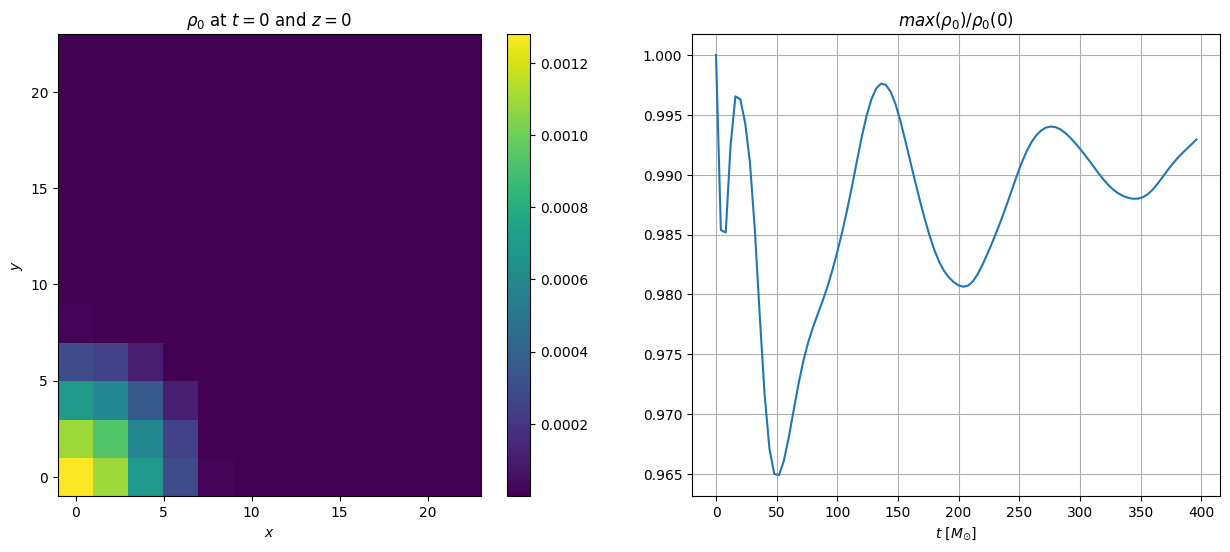

In [6]:
plt.figure(figsize=(15, 6))

# plot the first iteration
it_index = 0 # iteration index
iz = 0 # z slice index
plt.subplot(121)
plt.pcolor(fd.xarray, fd.yarray, data['rho0'][it_index][:,:,iz])
plt.colorbar()
plt.title(r'$\rho_0$ at $t=0$ and $z=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# get the maximum rest mass density at each iteration
data = aurel.over_time(data, fd, estimates=['max'])

# plot the maximum rest mass density as a function of time
plt.subplot(122)
plt.plot(data['t'], data['rho0_max'] / data['rho0_max'][0])
plt.grid()
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.title(r'$max(\rho_0) / \rho_0(0)$')

How about calculating further terms provided by AurelCore at each time step. 

Well this is all available with the `over_time` function, see the example:

Processing it = 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing estimation item: max
Now processing remaining time steps sequentially


  0%|          | 0/99 [00:00<?, ?it/s]

Done!


Text(0, 0.5, 'max($\\gamma$)')

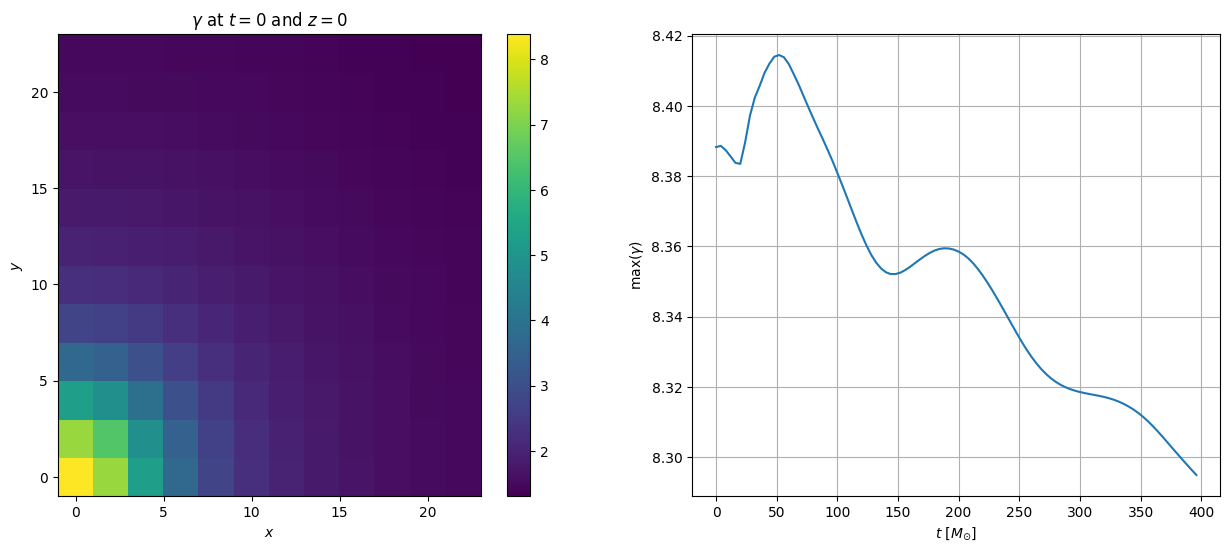

In [7]:
# calculating at the determinant of the spatial metric
variable = 'gammadet'
varstr = r'$\gamma$'
data = aurel.over_time(data, fd, vars=[variable], estimates=['max'])

plt.figure(figsize=(15, 6))

# plot the first iteration
plt.subplot(121)
plt.pcolor(fd.xarray, fd.yarray, data[variable][it_index][:,:,0])
plt.colorbar()
plt.title(varstr + r' at $t=0$ and $z=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# plot the maximum rest mass density as a function of time
plt.subplot(122)
plt.plot(data['t'], data[variable+'_max'])
plt.grid()
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel('max(' + varstr + ')')

## Want to work with a refined level?

In [8]:
# Delete the previous finitedifference class (or name the new one something else)
del fd
# now we will look at the following refinement level
rl = 1

# load the data from that level
data = aurel.read_data(
    param, 
    vars=['rho0', 'gammadown3'],
    it = np.arange(0, 409600, 4096),
    rl = rl, verbose=True)

# relevant parameters of this grid level
Nx, Ny, Nz = np.shape(data['rho0'][0])
grid = {
    'Nx': Nx, 'Ny': Ny, 'Nz': Nz,
    'xmin': 0.0, 'ymin': 0.0, 'zmin': 0.0,
    'dx': param['dx']/2**rl,
    'dy': param['dx']/2**rl,
    'dz': param['dx']/2**rl,
    'Lx': Nx * param['dx']/2**rl,
    'Ly': Ny * param['dx']/2**rl,
    'Lz': Nz * param['dx']/2**rl,
}
fd = aurel.FiniteDifference(grid)

Reading iterations in /Users/rlm36AA/simulations/tov_ET_group_one/iterations.txt
Restarts to process: []
Nothing new to process. Consider running with skip_last=False to analyse the last restart (if it is not an active restart).
Loading existing content from /Users/rlm36AA/simulations/tov_ET_group_one/output-0000/tov_ET_group_one/content.txt...
Loaded 16 variables from cache.
 =========== Restart 0:
vars to get ['rho0', 'gammadown3']:
Data read from split iterations: ['gxz', 'gzz', 'gxx', 'rho0', 'gyy', 'gyz', 'gxy', 't']
4th order finite difference schemes are defined


In [9]:
data = aurel.over_time(data, fd, vars=[variable], estimates=['max'])

Processing it = 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Processing estimation item: max
Now processing remaining time steps sequentially


  0%|          | 0/99 [00:00<?, ?it/s]

Done!


Text(0.5, 1.0, '$max(\\rho_0) / \\rho_0(0)$')

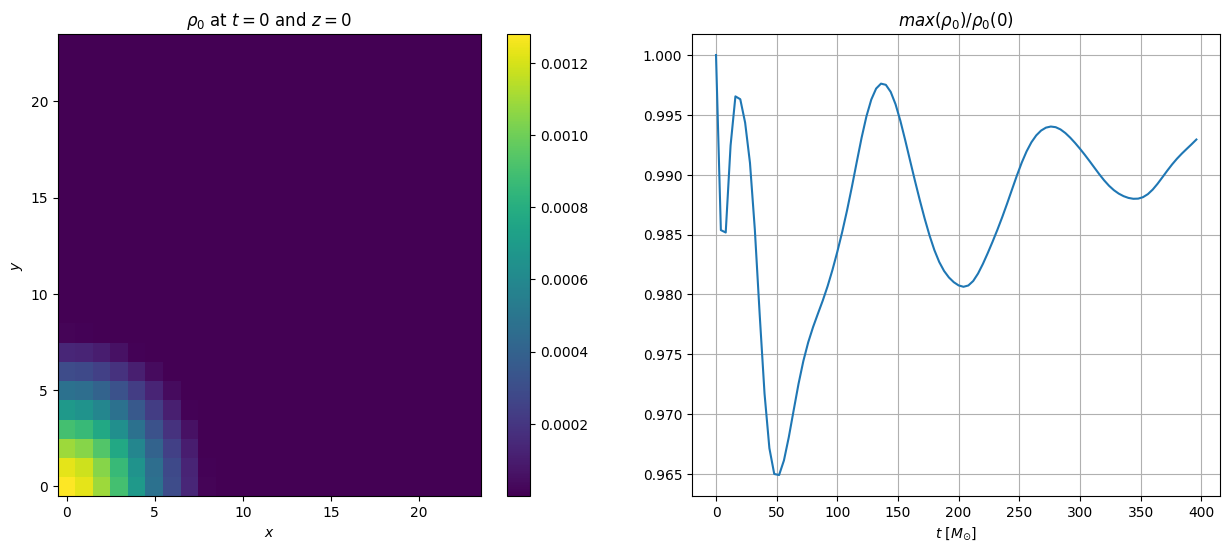

In [10]:
plt.figure(figsize=(15, 6))

# plot the first iteration
it_index = 0 # iteration index
iz = 0 # z slice index
plt.subplot(121)
plt.pcolor(fd.xarray, fd.yarray, data['rho0'][it_index][:,:,iz])
plt.colorbar()
plt.title(r'$\rho_0$ at $t=0$ and $z=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# plot the maximum rest mass density as a function of time
plt.subplot(122)
plt.plot(data['t'], data['rho0_max'] / data['rho0_max'][0])
plt.grid()
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.title(r'$max(\rho_0) / \rho_0(0)$')

Text(0, 0.5, 'max($\\gamma$)')

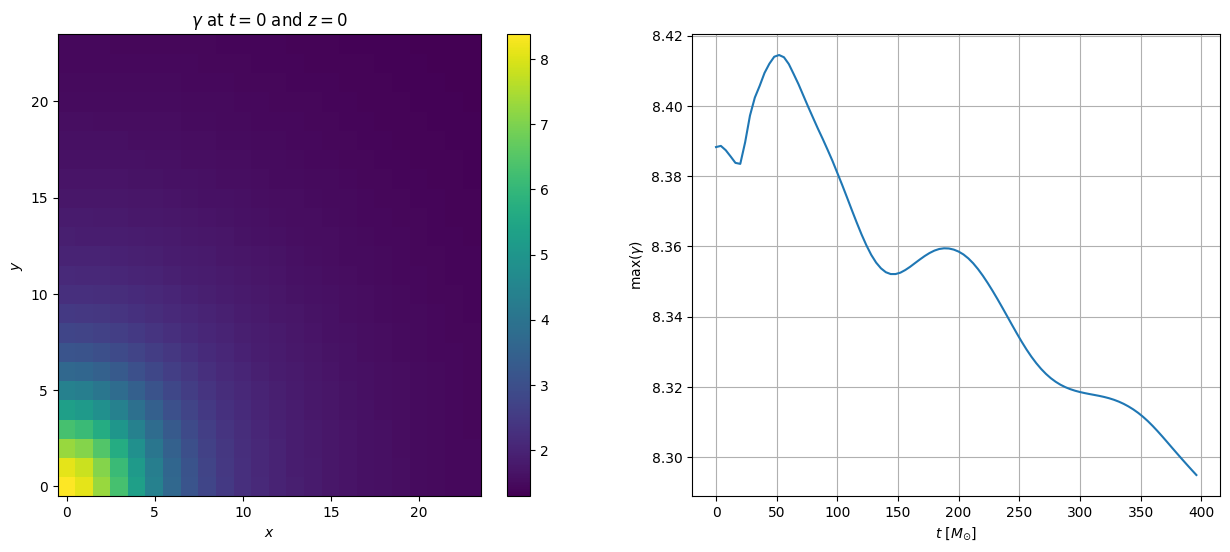

In [11]:
# calculating at the determinant of the spatial metric
variable = 'gammadet'
varstr = r'$\gamma$'

plt.figure(figsize=(15, 6))
it_index = 0

# plot the first iteration
plt.subplot(121)
plt.pcolor(fd.xarray, fd.yarray, data[variable][it_index][:,:,0])
plt.colorbar()
plt.title(varstr + r' at $t=0$ and $z=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# plot the maximum rest mass density as a function of time
plt.subplot(122)
plt.plot(data['t'], data[variable+'_max'])
plt.grid()
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel('max(' + varstr + ')')